In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import random

DATADIR = "your_data_directory"
CATEGORIES = ["class_2", "class_4", "class_6"] 
IMG_SIZE = 150
OVER_SAMPLE_CLASS = ["class_to_over_sample"]
UNDER_SAMPLE_CLASS = ["class_to_undersample"]

In [ ]:
# Importing necessary functions
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Initialising the ImageDataGenerator class.
# We will pass in the augmentation parameters in the constructor.
datagen = ImageDataGenerator(
        rotation_range = 20,
        shear_range = 0.1,
        zoom_range = 0.1,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))

for category in OVER_SAMPLE_CLASS: 
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
            image=Image.open(os.path.join(path, img))

            # Loading a sample image
            # Converting the input sample image to an array
            x = img_to_array(image)
            # Reshaping the input image
            x = x.reshape((1, ) + x.shape)

            # Generating and saving 10 augmented samples
            # using the above defined parameters.
            i = 0
            for batch in datagen.flow(x, batch_size = 1,
                                    save_to_dir = os.path.join(path),
                                    save_prefix ='gsv_augmented', save_format ='jpg'):
                i += 1
                if i > 1:
                    break


In [ ]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    images = os.listdir(path)
    random.shuffle(images)
    N = len(images[2000:])
    for img in images[:N]:
            os.remove(os.path.join(DATADIR, category, img))

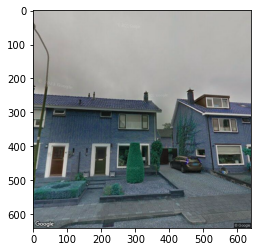

In [2]:
for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            plt.imshow(img_array)  # graph it
            plt.show()  # display!

            break  # we just want one for now so break
        break  #...and one more!
            

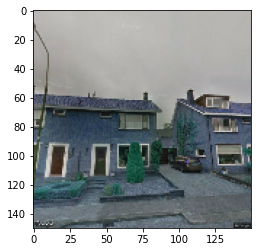

In [3]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  # get the classification  (0 to 12) for every class 

        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()

print(len(training_data))

23135


In [5]:
import random

random.shuffle(training_data)


In [6]:
for sample in training_data:
    print(sample[1])

1
0
2
2
1
0
0
0
0
2
0
2
2
0
0
2
1
2
0
2
2
2
0
1
1
1
2
0
1
0
0
1
0
1
2
2
1
1
0
1
0
0
1
2
0
1
1
0
0
1
2
0
0
2
0
0
2
2
0
2
1
2
2
0
0
1
2
2
1
2
0
2
0
2
0
0
0
1
0
2
1
2
0
0
1
1
0
0
2
2
1
0
0
1
1
0
2
0
2
2
2
1
1
2
1
1
1
0
0
2
0
2
0
2
0
2
1
2
1
1
1
2
0
0
2
0
2
0
1
0
0
0
1
1
1
1
1
0
0
0
1
1
0
1
2
0
1
0
1
1
2
1
1
1
0
2
2
1
0
2
1
2
2
1
2
2
1
2
0
0
1
1
2
0
1
0
2
1
2
1
0
2
1
2
0
2
1
1
1
1
1
0
1
0
0
0
1
2
1
2
0
1
1
0
1
0
2
1
2
2
2
1
1
0
1
0
2
0
2
1
1
0
0
1
1
2
1
1
0
2
0
2
1
2
1
1
2
0
2
0
1
0
0
0
2
2
0
2
0
0
1
1
2
1
0
0
0
1
1
0
2
0
0
0
1
1
1
0
2
2
2
2
0
0
1
0
0
0
0
2
1
0
1
2
2
0
0
0
0
0
2
0
1
0
2
2
1
0
2
1
0
2
2
1
0
2
0
0
2
2
0
0
2
2
0
2
0
0
2
0
1
1
0
0
1
2
0
1
1
2
1
2
1
2
2
2
0
0
0
0
2
2
0
1
0
2
0
0
1
2
2
2
0
2
2
2
1
1
1
1
1
2
0
0
1
0
0
0
0
1
2
0
2
2
0
0
2
2
0
0
1
1
1
1
1
1
0
2
2
2
0
0
1
0
0
2
2
0
2
2
0
2
1
0
0
2
1
2
1
0
1
0
2
1
1
2
1
2
2
1
2
2
1
1
2
0
0
1
2
1
1
0
0
1
0
0
0
1
0
2
1
2
1
0
2
0
2
0
2
1
0
2
2
1
0
2
1
1
0
0
0
1
2
1
0
1
1
2
0
0
0
1
2
1
1
2
2
0
1
1
2
1
0
2
2
1
0
0
1
2
0
2
1
2
2
1
2
0
0
1


In [7]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

[[[[210 199 202]
   [210 199 202]
   [211 200 203]
   ...
   [215 207 214]
   [216 208 215]
   [216 208 215]]

  [[210 199 202]
   [210 199 202]
   [210 199 202]
   ...
   [217 209 216]
   [216 208 215]
   [216 208 215]]

  [[210 199 202]
   [210 199 202]
   [209 198 201]
   ...
   [217 209 216]
   [215 207 214]
   [218 210 217]]

  ...

  [[ 63  79  86]
   [ 29  35  42]
   [ 46  49  53]
   ...
   [ 24  33  36]
   [ 15  24  27]
   [  7  13  17]]

  [[ 67  86  93]
   [ 71  79  86]
   [ 22  27  30]
   ...
   [ 95  99 101]
   [ 92  96  97]
   [ 16  20  22]]

  [[ 62  82  88]
   [ 70  81  88]
   [ 79  87  90]
   ...
   [ 22  28  36]
   [  1   6  14]
   [ 19  26  33]]]]


In [8]:
import pickle

pickle_out = open("X.pickle_IMG_BIGWO3final","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle_IMG_BIGWO3final","wb")
pickle.dump(y, pickle_out)
pickle_out.close()